# Chapter 7: Problems with the predictors

Load the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
%precision 7


'%.7f'

## Errors in the predictors

Load in the data:

In [2]:
cars = pd.read_csv("data/cars.csv")
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Set up the plot and the random seed

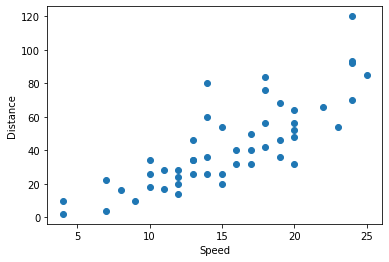

In [3]:
fig, ax = plt.subplots()
ax.scatter(cars.speed, cars.dist)
plt.xlabel("Speed")
plt.ylabel("Distance")
xr = np.array(ax.get_xlim())
np.random.seed(123)

Do the four fits with increasing amounts of error. Since we only need univariate regression np.polyfit is adequate.

In [4]:

est = np.polyfit(cars.speed, cars.dist, 1)
ax.plot(xr, est[1] + est[0] * xr)
est1 = np.polyfit(cars.speed + np.random.normal(size=50), cars.dist, 1)
ax.plot(xr, est1[1] + est1[0] * xr, c='red')
est2 = np.polyfit(cars.speed + np.random.normal(scale=2,size=50), cars.dist, 1)
ax.plot(xr, est2[1] + est2[0] * xr, c='green')
est5 = np.polyfit(cars.speed + np.random.normal(scale=5,size=50), cars.dist, 1)
ax.plot(xr, est5[1] + est5[0] * xr, c='cyan')
plt.show()

In [5]:
est, est1, est2, est5

(array([  3.9324088, -17.5790949]),
 array([  3.7603449, -14.9792162]),
 array([  3.47154  , -10.7660126]),
 array([2.0647813, 9.9521318]))

In [6]:
vv = np.repeat(np.array([0.1, 0.2, 0.3, 0.4, 0.5]), [1000, 1000, 1000, 1000, 1000])
slopes = np.zeros(5000)
for i in range(5000):
    slopes[i] = np.polyfit(cars.speed+np.random.normal(scale=np.sqrt(vv[i]), size=50), cars.dist, 1)[0]

In [7]:
betas = np.reshape(slopes, (5, 1000)).mean(axis=1)
betas = np.append(betas,est[0])
variances = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 0.5])
gv = np.polyfit(variances, betas,1)
gv

array([-0.1275732,  3.994792 ])

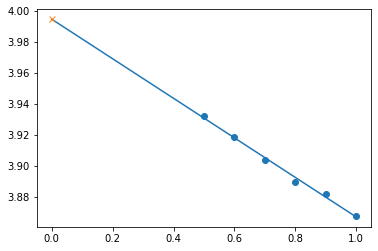

In [8]:
plt.scatter(variances, betas)
xr = np.array([0,1])
plt.plot(xr, np.array(gv[1] + gv[0]*xr))
plt.plot([0], [gv[1]], marker='x', markersize=6)
plt.show()

Do not believe there is a `simex` package for Python.

## Changes of Scale

Read in the data and fit the model:

In [9]:
savings = pd.read_csv("data/savings.csv",index_col=0)
lmod = smf.ols(formula = 'sr ~ pop15 + pop75 + dpi + ddpi', data=savings).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           0.000790
Time:                        16:52:06   Log-Likelihood:                -135.10
No. Observations:                  50   AIC:                             280.2
Df Residuals:                      45   BIC:                             289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5661      7.355      3.884      0.000      13.753      43.379
pop15         -0.4612      0.145     -3.189      0.003      -0.753      -0.170
pop75         -1.6915      1.084     -1.561      0.126      -3.874       0.491
dpi           -0.0003      0.001     -0.362      0.719      -0.002       0.002
ddpi           0.4097      0.196      2.088      0.042       0.015       0.805
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rescale one of the predictors:

In [10]:
lmod = smf.ols(formula = 'sr ~ pop15 + pop75 + I(dpi/1000) + ddpi', data=savings).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           0.000790
Time:                        16:52:06   Log-Likelihood:                -135.10
No. Observations:                  50   AIC:                             280.2
Df Residuals:                      45   BIC:                             289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        28.5661      7.355      3.884      0.000      13.753      43.379
pop15            -0.4612      0.145     -3.189      0.003      -0.753      -0.170
pop75            -1.6915      1.084     -1.561      0.126      -3.874       0.491
I(dpi / 1000)    -0.3369      0.931     -0.362      0.719      -2.212       1.538
ddpi              0.4097      0.196      2.088      0.042       0.015       0.805
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standardize all the variables:

In [11]:
scsav = savings.apply(sp.stats.zscore)
lmod = smf.ols(formula = 'sr ~ pop15 + pop75 + dpi + ddpi', data=scsav).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           0.000790
Time:                        16:52:06   Log-Likelihood:                -60.617
No. Observations:                  50   AIC:                             131.2
Df Residuals:                      45   BIC:                             140.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.665e-16      0.121   1.37e-15      1.000      -0.244       0.244
pop15         -0.9420      0.295     -3.189      0.003      -1.537      -0.347
pop75         -0.4873      0.312     -1.561      0.126      -1.116       0.141
dpi           -0.0745      0.206     -0.362      0.719      -0.489       0.340
ddpi           0.2624      0.126      2.088      0.042       0.009       0.516
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                         5.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Set up data frame and make a plot of the estimates and confidence intervals:

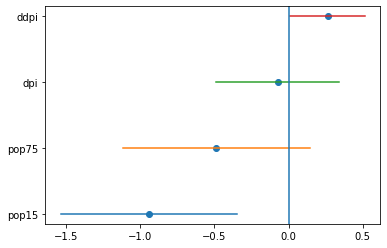

In [12]:
edf = pd.concat([lmod.params, lmod.conf_int()],axis=1).iloc[1:,]
edf.columns = ['estimate','lb','ub']
npreds = edf.shape[0]
fig, ax = plt.subplots()
ax.scatter(edf.estimate,np.arange(npreds))
for i in range(npreds):
    ax.plot([edf.lb[i], edf.ub[i]], [i, i])
ax.set_yticks(np.arange(npreds))
ax.set_yticklabels(edf.index)
ax.axvline(0)
plt.show()

Do Gelman's rescaling:

In [13]:
savings['age'] = np.where(savings.pop15 > 35, 0, 1)
savings['dpis'] = sp.stats.zscore(savings.dpi)/2
savings['ddpis'] = sp.stats.zscore(savings.ddpi)/2
smf.ols(formula='sr ~ age + dpis + ddpis', data=savings).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     7.374
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           0.000391
Time:                        16:52:06   Log-Likelihood:                -135.61
No. Observations:                  50   AIC:                             279.2
Df Residuals:                      46   BIC:                             286.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8176      1.011      6.746      0.000       4.783       8.852
age            5.2841      1.585      3.334      0.002       2.094       8.474
dpis          -1.5485      1.593     -0.972      0.336      -4.755       1.658
ddpis          2.4433      1.097      2.227      0.031       0.235       4.651
==============================================================================
Omnibus:                        2.962   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                1.987
Skew:                           0.433   Prob(JB):                        0.370
Kurtosis:                       3.451   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Collinearity

Read in the data:

In [14]:
seatpos = pd.read_csv("data/seatpos.csv")
seatpos.head()

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
0,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
1,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
2,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
3,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
4,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230


Fit a model with all the predictors:

In [15]:
lmod = smf.ols(formula = 'hipcenter ~ Age+Weight+HtShoes+Ht+Seated+Arm+Thigh+Leg', data=seatpos).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hipcenter   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     7.940
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.31e-05
Time:                        16:52:06   Log-Likelihood:                -186.73
No. Observations:                  38   AIC:                             391.5
Df Residuals:                      29   BIC:                             406.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    436.4321    166.572      2.620      0.014      95.755     777.109
Age            0.7757      0.570      1.360      0.184      -0.391       1.942
Weight         0.0263      0.331      0.080      0.937      -0.651       0.703
HtShoes       -2.6924      9.753     -0.276      0.784     -22.640      17.255
Ht             0.6013     10.130      0.059      0.953     -20.117      21.319
Seated         0.5338      3.762      0.142      0.888      -7.160       8.228
Arm           -1.3281      3.900     -0.341      0.736      -9.305       6.649
Thigh         -1.1431      2.660     -0.430      0.671      -6.583       4.297
Leg           -6.4390      4.714     -1.366      0.182     -16.080       3.202
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.664
Skew:                           0.157   Prob(JB):                        0.717
Kurtosis:                       2.434   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Look at the correlations of the predictors:

In [16]:
seatpos.iloc[:,:-1].corr().round(3)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg
Age,1.000,0.081,-0.079,-0.090,-0.170,0.360,0.091,-0.042
Weight,0.081,1.000,0.828,0.829,0.776,0.698,0.573,0.784
HtShoes,-0.079,0.828,1.000,0.998,0.930,0.752,0.725,0.908
Ht,-0.090,0.829,0.998,1.000,0.928,0.752,0.735,0.910
Seated,-0.170,0.776,0.930,0.928,1.000,0.625,0.607,0.812
Arm,0.360,0.698,0.752,0.752,0.625,1.000,0.671,0.754
Thigh,0.091,0.573,0.725,0.735,0.607,0.671,1.000,0.650
Leg,-0.042,0.784,0.908,0.910,0.812,0.754,0.650,1.000


Do the eigendecomposition. Gives similar but not identical results to R calculation.

In [17]:
X = seatpos.iloc[:,:-1]
XTX = np.dot(X.T,X)
evals, evecs = np.linalg.eig(XTX)
evals

array([3.6536714e+06, 2.1479480e+04, 9.0432253e+03, 2.9895260e+02,
       1.4839482e+02, 7.2982092e+00, 8.1173974e+01, 5.3361943e+01])

Calculate the condition numbers;

In [18]:
evals[0]/evals

array([1.0000000e+00, 1.7010055e+02, 4.0402304e+02, 1.2221574e+04,
       2.4621286e+04, 5.0062574e+05, 4.5010379e+04, 6.8469608e+04])

Compute the variance inflation factors:

In [19]:
from patsy import dmatrix
X = dmatrix("Age+Weight+HtShoes+Ht+Seated+Arm+Thigh+Leg", data=seatpos, return_type='dataframe')
lmod = sm.OLS(X['Age'],X.drop('Age',axis=1)).fit()
lmod.rsquared

0.49948233386392404

In [20]:
1/(1-lmod.rsquared)

1.9979314770642473

Get them all:

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.Series(vif, X.columns)

Intercept    741.029693
Age            1.997931
Weight         3.647030
HtShoes      307.429378
Ht           333.137832
Seated         8.951054
Arm            4.496368
Thigh          2.762886
Leg            6.694291
dtype: float64

Change in coefficients due to perturbing the response

In [22]:
seatpos['hiperb'] = seatpos.hipcenter+np.random.normal(scale=10,size=38)
lmod = smf.ols(formula = 'hipcenter ~ Age+Weight+HtShoes+Ht+Seated+Arm+Thigh+Leg', data=seatpos).fit()
lmodp = smf.ols(formula = 'hiperb ~ Age+Weight+HtShoes+Ht+Seated+Arm+Thigh+Leg', data=seatpos).fit()
pd.DataFrame([lmod.params, lmodp.params])

,Intercept,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg
0,436.432128,0.775716,0.026313,-2.692408,0.601345,0.533752,-1.328069,-1.143119,-6.439046
1,389.146330,0.751927,-0.001767,-2.779268,1.629064,-0.167238,-0.757036,-1.740402,-7.524041


Change in R-squared

In [23]:
lmod.rsquared, lmodp.rsquared

(0.6865534760253379, 0.6520350104273814)

Correlations of the length variables

In [24]:
pd.DataFrame.corr(X.iloc[3:,3:]).round(3)

,HtShoes,Ht,Seated,Arm,Thigh,Leg
HtShoes,1.000,0.998,0.930,0.722,0.710,0.896
Ht,0.998,1.000,0.929,0.724,0.720,0.898
Seated,0.930,0.929,1.000,0.603,0.576,0.803
Arm,0.722,0.724,0.603,1.000,0.670,0.723
Thigh,0.710,0.720,0.576,0.670,1.000,0.626
Leg,0.896,0.898,0.803,0.723,0.626,1.000


Recommended smaller model:

In [25]:
smf.ols(formula = 'hipcenter ~ Age+Weight+Ht', data=seatpos).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hipcenter   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     21.63
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           5.13e-08
Time:                        16:52:07   Log-Likelihood:                -188.49
No. Observations:                  38   AIC:                             385.0
Df Residuals:                      34   BIC:                             391.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    528.2977    135.313      3.904      0.000     253.309     803.287
Age            0.5195      0.408      1.273      0.212      -0.310       1.349
Weight         0.0043      0.312      0.014      0.989      -0.629       0.638
Ht            -4.2119      0.999     -4.216      0.000      -6.242      -2.182
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.868
Skew:                          -0.341   Prob(JB):                        0.648
Kurtosis:                       2.713   Cond. No.                     5.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

ModuleNotFoundError: No module named 'version_information'